<a href="https://colab.research.google.com/github/FestuMiles/classification-model-unza-publications/blob/main/UNZA_Vision2030_Data_Modeling_%26_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 Load Data & Setup

In [ ]:
import os, re, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download("punkt_tab")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#Mounting to the drive so that created files are saved
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Navigating to the shared team project folder
#instructions: ensure you have created a shortcut of the shared folder in the drive
#root directory
%cd "/content/drive/My Drive/Group Project"

/content/drive/MyDrive/data_mining/Group Project


In [ ]:
pub_data = pd.read_csv('unza_faculty_publications_details.csv')

In [ ]:
pub_data.columns = pub_data.columns.str.lower()

In [ ]:
pub_data = pub_data[['title','category','main_category']]

In [ ]:
pub_data.drop_duplicates('title', inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
stemmer = PorterStemmer()

def to_lower(text):
    return text.lower()

def remove_punc(text):
    return ''.join(char for char in text if char not in string.punctuation)

def remove_stopw(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return " ".join(word for word in tokens if word not in stop_words)

def stem_word(text):
    tokens = word_tokenize(text)
    return " ".join(stemmer.stem(word) for word in tokens)

def title_pipeline(text):
    if not isinstance(text, str):
        return ""
    text = to_lower(text)
    text = remove_punc(text)
    text = remove_stopw(text)
    text = stem_word(text)
    return text

pub_data['cleaned_title'] = pub_data['title'].apply(title_pipeline)


# Modeling

## Spliting the data

We are spliting the data into two sets, one using categories and the other using the main categories. Using the main categories allows us to maximize the dataset per category, which we believe will improve the prediction accuracy.

To evaluate the model's ability to generalize to unseen data, we will split the dataset into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance. We will use a common split ratio, such as 80% for training and 20% for testing.

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(pub_data['cleaned_title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

X = tfidf_df

y = pub_data['category']
# Spliting the testing and training data based on sub-categories
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y = pub_data['main_category']
# Spliting the testing and training data based on main categories
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

We used Naive Bayes, Logistic Regression, and Linear SVM because they are some of the most effective algorithms for text classification. Naive Bayes is simple and works well with word frequencies, Logistic Regression is strong and interpretable for high-dimensional text data, and Linear SVM is powerful for separating categories in sparse TF-IDF features. Comparing these three gives us a good balance of speed, accuracy, and reliability.

In [ ]:
# Importing the libraries for modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

## Modeling using specific categories

Using the three algorithms, we trained three models based on the specififc categories (21 categories) from the collected data set.

In [ ]:
nb_model1 = MultinomialNB(alpha=1.0)
nb_model1 .fit(X_train1, y_train1)

MultinomialNB()

In [ ]:

svc_model1 = LinearSVC(C=1.0)
svc_model1.fit(X_train1, y_train1)

LinearSVC()

In [ ]:

lr_model1 = LogisticRegression(max_iter=1000)
lr_model1.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000)

## Modeling using main categories

Using the three algorithms, we again trained three models based on the main categories (3 categories) from the collected data set.

In [ ]:
nb_model2 = MultinomialNB(alpha=1.0)
nb_model2 .fit(X_train2, y_train2)

MultinomialNB()

In [ ]:
svc_model2 = LinearSVC(C=1.0)
svc_model2.fit(X_train2, y_train2)

LinearSVC()

In [ ]:
lr_model2 = LogisticRegression(max_iter=1000)
lr_model2.fit(X_train2, y_train2)

LogisticRegression(max_iter=1000)

# Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

## Evalution of the three models trained on specific categories

Naive Bayes reached an accuracy of 46%. It worked well for a few categories like Mining, Gender, Health, and Education, but it performed very poorly on many others. For example, it completely failed to classify Tourism and Transport. Overall, it was too simple for this task.


===== Naive Bayes =====

                                      precision    recall  f1-score   support

agriculture, livestock and fisheries       0.30      0.59      0.40        17
                  commerce and trade       0.23      0.56      0.32        18
                       communication       0.41      0.77      0.54        22
                        construction       0.83      0.48      0.61        21
                 disaster management       0.43      0.14      0.21        22
                 economic management       0.50      0.05      0.08        22
                           education       0.44      1.00      0.61        21
                              energy       0.57      0.62      0.59        13
   environment and natural resources       0.67      0.15      0.25        13
                              gender       0.60      0.79      0.68        19
                          governance       0.26      0.45      0.33        11
                              health 

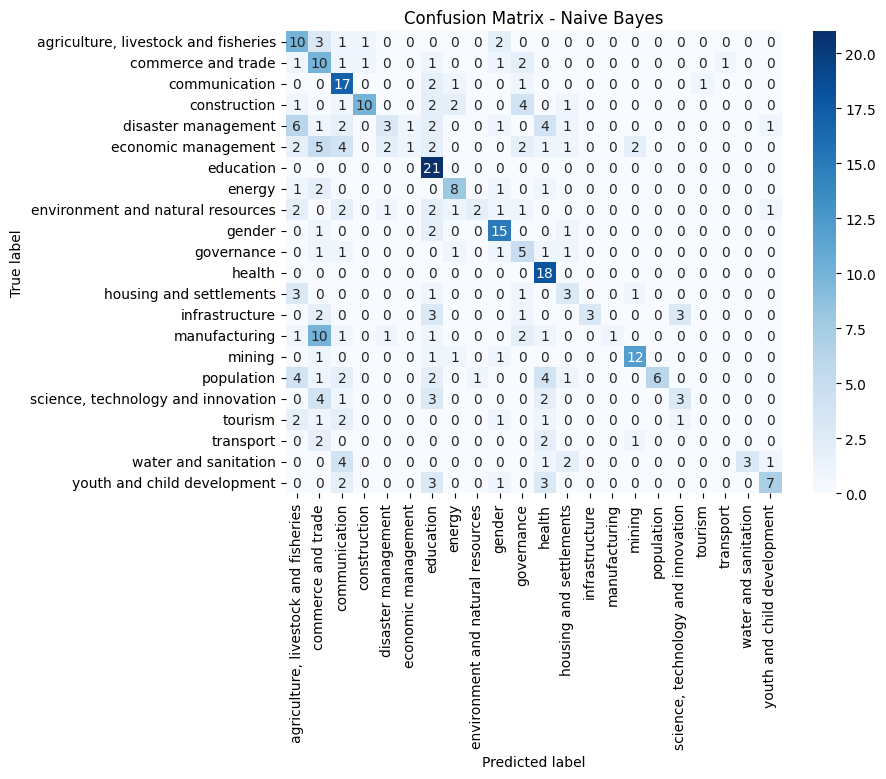

In [ ]:
print(f"\n===== Naive Bayes =====\n")
y_pred = nb_model1.predict(X_test1)
print(classification_report(y_test1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test1, y_pred, labels=nb_model1.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=nb_model1.classes_,
            yticklabels=nb_model1.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()



The Linear SVM gave the best results, reaching 57% accuracy. It was more balanced across categories, performing strongly in Health, Education, Gender, Mining, and Energy. However, it still struggled with smaller categories like Tourism, Transport, and Disaster Management.


===== Linear SVM =====

                                      precision    recall  f1-score   support

agriculture, livestock and fisheries       0.50      0.59      0.54        17
                  commerce and trade       0.38      0.44      0.41        18
                       communication       0.60      0.82      0.69        22
                        construction       0.73      0.52      0.61        21
                 disaster management       0.56      0.23      0.32        22
                 economic management       0.44      0.32      0.37        22
                           education       0.65      0.95      0.77        21
                              energy       0.58      0.85      0.69        13
   environment and natural resources       0.46      0.46      0.46        13
                              gender       0.79      0.79      0.79        19
                          governance       0.39      0.64      0.48        11
                              health  

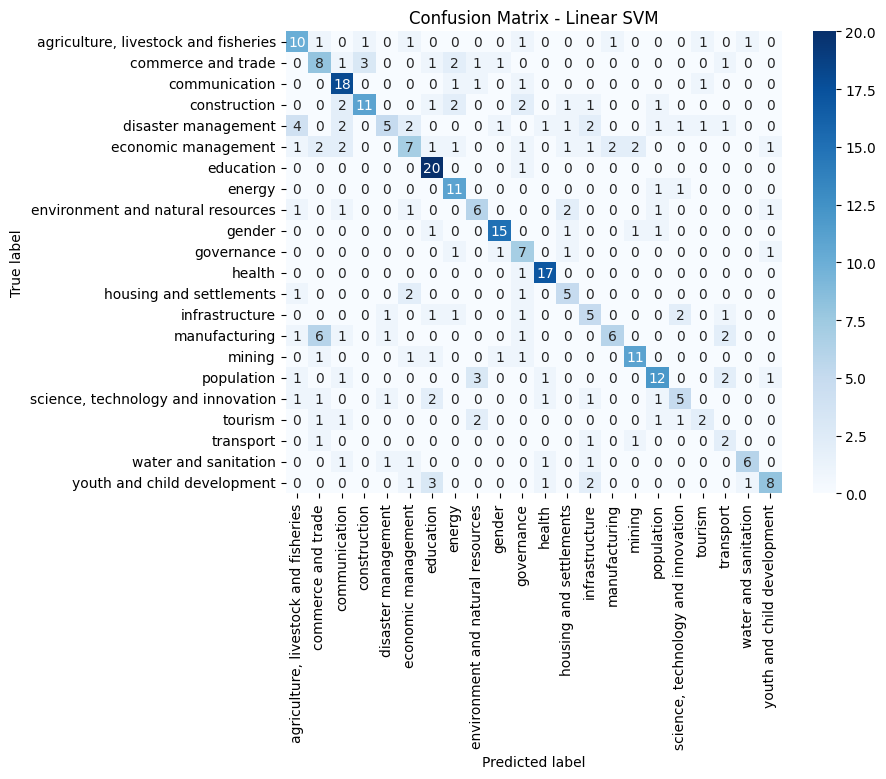

In [ ]:
print(f"\n===== Linear SVM =====\n")
y_pred = svc_model1.predict(X_test1)
print(classification_report(y_test1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test1, y_pred, labels=svc_model1.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=svc_model1.classes_,
            yticklabels=svc_model1.classes_)
plt.title("Confusion Matrix - Linear SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


Logistic Regression improved slightly, with an accuracy of 53%. It did quite well on Health, Education, Gender, and Water and Sanitation. However, it still struggled on classes like Disaster Management and Science and Technology. In some cases, it was very precise but missed many true cases, showing that it still had problems.


===== Logistic Regresion =====

                                      precision    recall  f1-score   support

agriculture, livestock and fisheries       0.25      0.65      0.36        17
                  commerce and trade       0.23      0.50      0.32        18
                       communication       0.60      0.82      0.69        22
                        construction       0.85      0.52      0.65        21
                 disaster management       0.57      0.18      0.28        22
                 economic management       0.71      0.23      0.34        22
                           education       0.59      0.95      0.73        21
                              energy       0.53      0.77      0.62        13
   environment and natural resources       0.50      0.23      0.32        13
                              gender       0.70      0.84      0.76        19
                          governance       0.40      0.55      0.46        11
                              

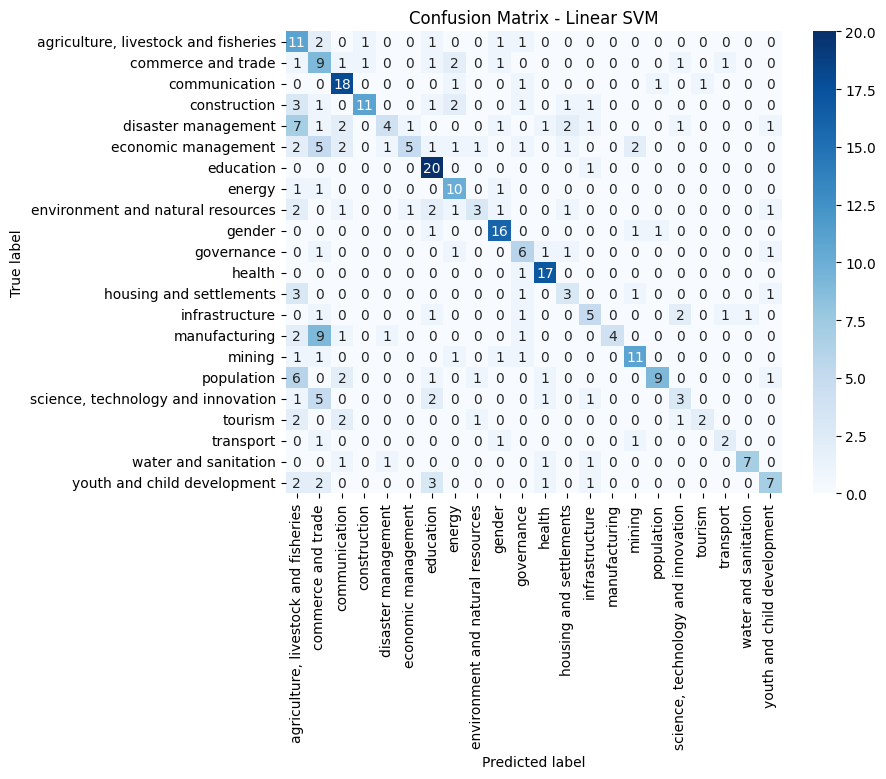

In [ ]:
print(f"\n===== Logistic Regresion =====\n")
y_pred = lr_model1.predict(X_test1)
print(classification_report(y_test1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test1, y_pred, labels=lr_model1.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=lr_model1.classes_,
            yticklabels=lr_model1.classes_)
plt.title("Confusion Matrix - Linear SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


**Comparison**

* Naive Bayes: Weakest model (46%).

* Logistic Regression: Better, but still low (53%).

* Linear SVM: Best overall (57%), but still far from 80%.

None of the models came close to the required 80% accuracy. The main reasons are that some categories have very little data, some categories use similar language (making them hard to separate), and these models may not be powerful enough for the complexity of the data.

### Effect of Dataset on Results

The dataset used for this study contained 1,720 records spread across 22 categories. While this provides a starting point for training classification models, the relatively small dataset size had a direct effect on the results and model performance.

The dataset is highly imbalanced across the 22 categories. Some categories have close to 100 samples (Commerce and Trade = 98, Agriculture = 97, Communication = 97, Health = 96), while others have fewer than 60 samples (Tourism = 49, Transport = 54, Water and Sanitation = 57).

This imbalance affects the models in two ways:

1. Models perform better on larger categories. For example, Health, Education, and Communication had higher F1-scores because they had more training data.

2. Smaller categories are harder to learn. Categories like Tourism, Transport, and Water and Sanitation had very poor F1-scores across all models because there were not enough examples for the models to recognize consistent patterns.

Even within mid-sized categories, performance varied depending on how much their language overlapped with others. For instance, Economic Management, Governance, and Disaster Management might have had similar terms, making it hard for the models to distinguish between them despite having a reasonable number of samples.

## Evalution of the three models trained on main categories

Naive Bayes achieved an overall accuracy of 65%. While it performed well on Economic Growth and Wealth Creation (high recall), it struggled with Enabling Environment for Sustainable Development, showing very low recall (0.07). This suggests that Naive Bayes favored majority classes more strongly.


===== Naive Bayes =====

                                                  precision    recall  f1-score   support

             Economic Growth and Wealth Creation       0.61      0.95      0.75       163
Enabling Environment for Sustainable Development       1.00      0.07      0.13        89
         Social Investment and Human Development       0.75      0.69      0.72        94

                                        accuracy                           0.65       346
                                       macro avg       0.79      0.57      0.53       346
                                    weighted avg       0.75      0.65      0.58       346



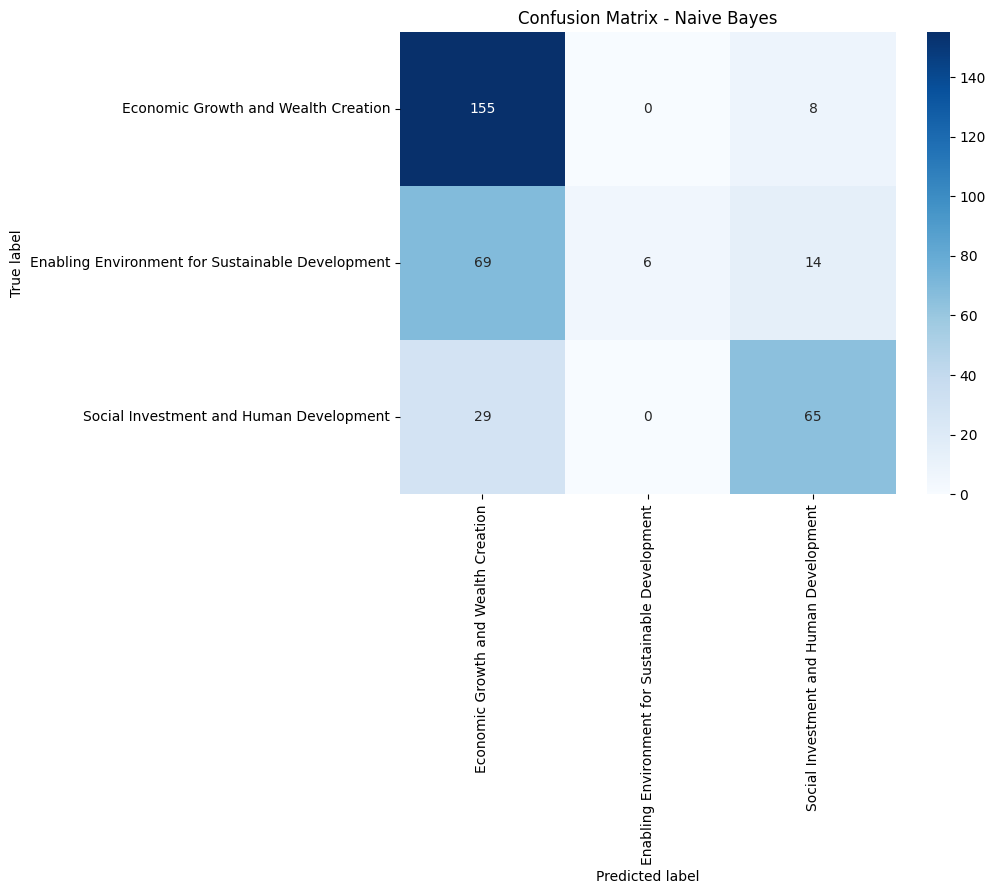

In [ ]:
print(f"\n===== Naive Bayes =====\n")
y_pred = nb_model2.predict(X_test2)
print(classification_report(y_test2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test2, y_pred, labels=nb_model2.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=nb_model2.classes_,
            yticklabels=nb_model2.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


Linear SVM produced the best overall performance with an accuracy of 73%, balanced precision and recall across categories, and an F1-score close to 0.80 for two of the categories. This indicates that SVM benefited the most from the regrouped dataset.


===== Linear SVM =====

                                                  precision    recall  f1-score   support

             Economic Growth and Wealth Creation       0.73      0.82      0.77       163
Enabling Environment for Sustainable Development       0.61      0.46      0.53        89
         Social Investment and Human Development       0.79      0.81      0.80        94

                                        accuracy                           0.73       346
                                       macro avg       0.71      0.70      0.70       346
                                    weighted avg       0.72      0.73      0.72       346



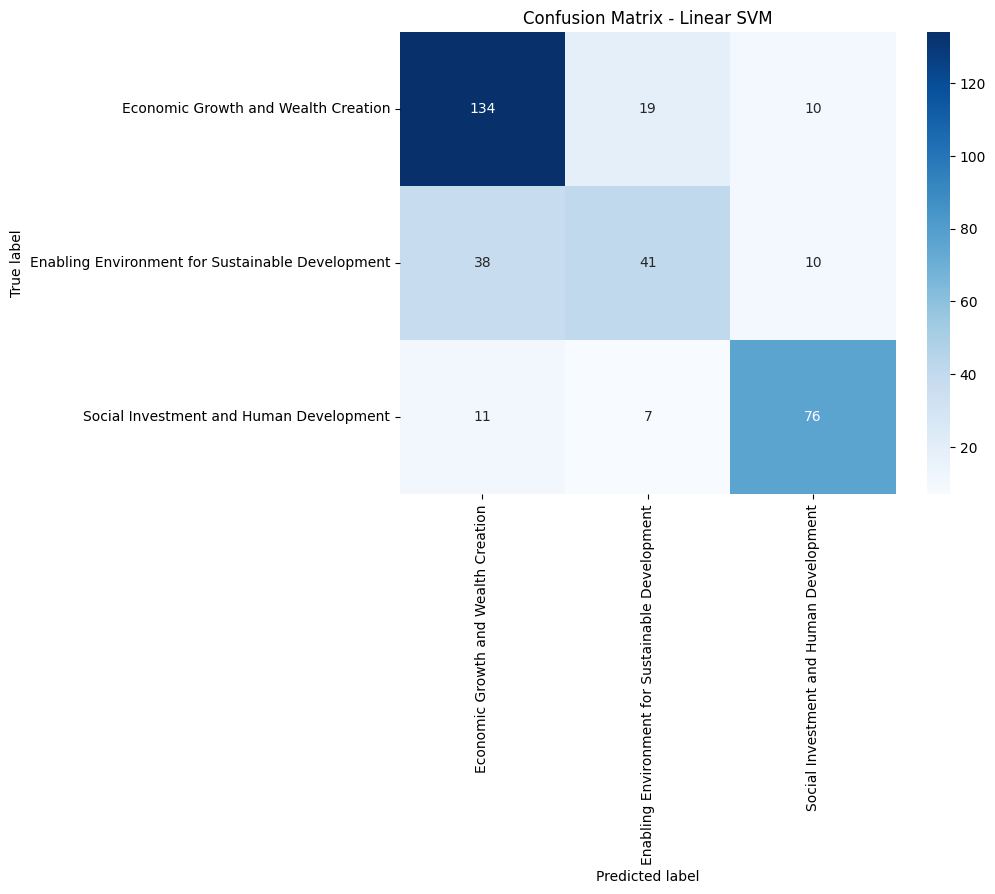

In [ ]:
print(f"\n===== Linear SVM =====\n")
y_pred = svc_model2.predict(X_test2)
print(classification_report(y_test2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test2, y_pred, labels=svc_model2.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=svc_model2.classes_,
            yticklabels=svc_model2.classes_)
plt.title("Confusion Matrix - Linear SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

Logistic Regression achieved an overall accuracy of 69%. Like Naive Bayes, it was strong on Economic Growth and Wealth Creation but weaker on Enabling Environment for Sustainable Development.


===== Logistic Regresion =====

                                                  precision    recall  f1-score   support

             Economic Growth and Wealth Creation       0.65      0.91      0.76       163
Enabling Environment for Sustainable Development       0.70      0.21      0.33        89
         Social Investment and Human Development       0.77      0.74      0.76        94

                                        accuracy                           0.69       346
                                       macro avg       0.71      0.62      0.62       346
                                    weighted avg       0.70      0.69      0.65       346



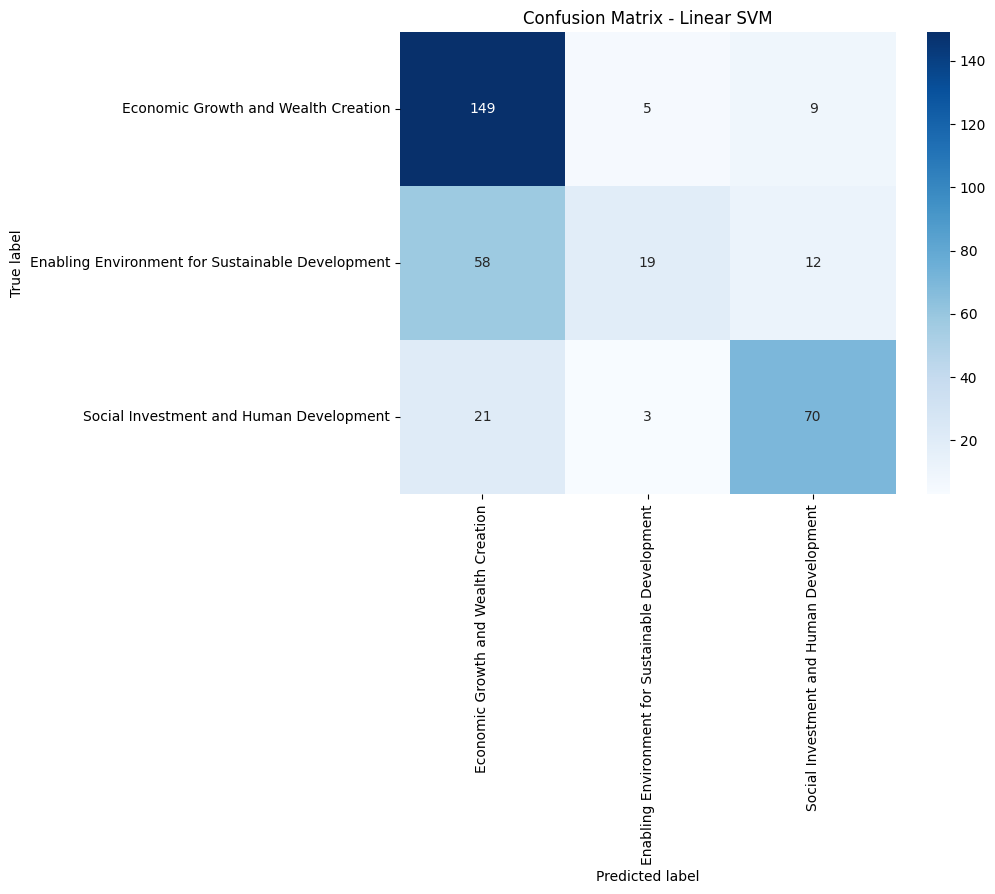

In [ ]:
print(f"\n===== Logistic Regresion =====\n")
y_pred = lr_model2.predict(X_test2)
print(classification_report(y_test2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test2, y_pred, labels=lr_model2.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=lr_model2.classes_,
            yticklabels=lr_model2.classes_)
plt.title("Confusion Matrix - Linear SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

## Effect of Grouping Categories on Model Performance

Grouping the dataset into broader categories improved performance by addressing the limitations of small and imbalanced class sizes. This experiment demonstrates that dataset size and category representation significantly affect classification results.

# Deployment

Function that accepts a publication title, a model and a vectorizer and returns the publication category.

In [ ]:
def fxn_predict_new_instance(text, model, vectorizer):
    """
    Simulates deployment by predicting the research category
    for a new publication title using the trained Linear SVM model.

    Parameters:
        text (str): The new publication title.
        model: The trained classifier (e.g., svc_model1).
        vectorizer: The fitted TF-IDF vectorizer.

    Returns:
        str: Predicted category label.
    """
    # Applying preprocessing
    processed_text = title_pipeline(text)

    # Transforming the text into TF-IDF features
    X_new = vectorizer.transform([processed_text])

    # Predicting category
    prediction = model.predict(X_new)[0]

    return prediction


In [ ]:
text = "Implementation of civic entrepreneurship in the governance of the university of Zambia."
new_title = input("Enter publication title: ")
predicted_category = fxn_predict_new_instance(new_title, svc_model1, tfidf_vectorizer)
print("Predicted Category:", predicted_category)


Enter publication title: Implementation of civic entrepreneurship in the governance of the university of Zambia.
Predicted Category: governance


## Deployment Plan

For deployment, our model can be made accessible in two main ways: through a Python function for programmatic use, and through a user-friendly interface for non-technical users.

1. Python Function (Current Approach)

* We created a function (fxn_predict_new_instance()) that allows us to input a new publication title and receive a predicted research category.

* This function is lightweight and easy to integrate into existing research workflows, scripts, or data processing pipelines.

2. Web or Desktop User Interface (Future Enhancement)

* To make the model accessible to faculty and administrators who may not use Python, we can build a simple web-based interface (using tools like Flask, Django, or Streamlit).

* In this interface, the end-user would type or paste a publication title into a text box and click a “Classify” button.

* The model would process the input behind the scenes, run the classification, and display the predicted research category.

* Results could be shown in a clear format, e.g., “Predicted Category: Agriculture”, and optionally with a confidence score (probability).

3. Extended Features

* The interface could also allow batch uploads (e.g., an Excel or CSV file of titles) to classify multiple publications at once.

* A dashboard could visualize trends, such as the number of publications per category over time or by faculty.

* This would make the system more practical for research administrators and policy makers, helping them monitor contributions toward national goals like Vision 2030.

In summary: End-users would either call the Python function directly in code or interact with a simple web interface where they input a publication title, click a button, and instantly see the predicted research category.

## Limitations and Future Work

While the project produced useful results, there were a few limitations worth noting. First, our dataset was relatively small in some categories, which made it harder for the models to learn clear patterns. Although we improved this by grouping subcategories into main categories, the results would likely be even better with a larger and more balanced dataset. Second, we relied mainly on publication titles, which are often very short and may not fully capture the scope of a research paper. Using abstracts or full texts could provide richer information and improve classification accuracy. Another limitation was that some categories naturally overlap, leading to misclassifications that reflect the interdisciplinary nature of research.

For future work, we recommend expanding the dataset by including more years of publications and adding additional features such as abstracts, author details, or keywords. We could also explore deep learning methods, like recurrent neural networks (RNNs) or transformer models (e.g., BERT), which are especially powerful for text data. Finally, an interactive dashboard could be developed to visualize research trends across faculties over time, making the results more accessible and useful for decision-making at UNZA.

## Summary

In this project, we set out to classify UNZA faculty research interests using publication titles, and we discovered several important insights. First, we learned that the quality and size of the dataset play a big role in the performance of machine learning models. Cleaning the data by removing punctuation, stop words, and duplicates, as well as standardizing terms, helped improve consistency and ensured that the models could focus on the most meaningful words. We also experimented with creating main categories by grouping related subcategories together. This step was important because it increased the amount of data available in each category, reduced imbalance between small and large classes, and gave the models a better chance of learning clear patterns.

We tested three algorithms—Naive Bayes, Logistic Regression, and Linear SVM—using TF-IDF to represent the text as numerical features. Naive Bayes gave us a simple and fast baseline, but Logistic Regression and Linear SVM performed better overall, showing higher accuracy on the classification tasks. We also found that categories like Agriculture and Health were easier to classify due to their unique vocabulary, while other categories overlapped, showing the interdisciplinary nature of some research work.

Overall, the project showed that with a well-cleaned and sufficiently large dataset, machine learning can be a powerful tool for automatically organizing research outputs. This not only helps in tracking faculty research interests but also supports broader institutional goals, such as highlighting expertise, identifying research trends, and contributing toward UNZA’s role in achieving Vision 2030.